## Introduction


In this notebook, we have extracted the nifty minute wise data from 2008 to 2021 and then we made various indicators. Next we will check the significance of these filters and finally we will make trading decisions based on the best indicators, we will also make trading models based on combinations of these indicators.
In the end, we will select the model which will give the best results(Trading profits) on the test data.

Steps:

1) **Load Data:**
We had all the data in txt format and that too month wise, so I cleaned the data in txt format and arranged them year wise and here we extracted all the data and combined them together to make our main dataframe.

2) **Data Cleaning and Downcast:**
Checked if there are any extreme outliers and removed only the extreme visible outliers.

3) **Feature Generation (Indicators):**
We made 2 indicators manually and for the rest of the indicators we used the pre built technical analysis library to capture these indicator values.


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import numpy as np
#import unirest
from matplotlib import rcParams
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import os
%matplotlib inline
pd.options.display.max_columns = None

## Load Data 
Load and convert text data to dataframe.

In [2]:
# Check data
path ='/Users/adamyanayyar/Desktop/Intraday 1 Min Data/2012/nifty2012.txt'
df = pd.read_csv(path, sep='\t', delimiter = ",", header=None)
df.columns = ['Symbol', 'Date','Time', 'Open', 'High','Low','Close']
df['Datetime'] = pd.to_datetime(df['Date'].apply(str)+' '+df['Time'])
df.index= df.Datetime
df.drop(['Date','Time','Datetime'],axis=1,inplace=True)
df.head()

,Symbol,Open,High,Low,Close
Datetime,,,,,
2012-01-02 09:16:00,NIFTY,4639.80,4643.25,4618.25,4621.35
2012-01-02 09:17:00,NIFTY,4621.55,4623.75,4616.40,4617.45
2012-01-02 09:18:00,NIFTY,4617.15,4628.30,4617.15,4628.30
2012-01-02 09:19:00,NIFTY,4627.95,4632.25,4626.15,4631.95
2012-01-02 09:20:00,NIFTY,4632.20,4633.50,4631.30,4632.90


For our model we will make a lot of features and indicators which will help us in making trading decisions.

We don't have the complete data of volume and OI, so we will drop those features as of now.

In [45]:
def load_data(path):
    df = pd.read_csv(path, sep='\t', delimiter = ",", header=None)
    df.columns = ['Symbol', 'Date','Time', 'Open', 'High','Low','Close']
    df['Datetime'] = pd.to_datetime(df['Date'].apply(str)+' '+df['Time'])
    df.index= df.Datetime
    df.drop(['Symbol','Date','Time','Datetime'],axis=1,inplace=True)
    return df
def load_data2(path):
    df = pd.read_csv(path, sep='\t', delimiter = ",", header=None)
    df.columns = ['Symbol', 'Date','Time', 'Open', 'High','Low','Close','OI']
    df['Datetime'] = pd.to_datetime(df['Date'].apply(str)+' '+df['Time'])
    df.index= df.Datetime
    df.drop(['Symbol','Date','Time','Datetime','OI'],axis=1,inplace=True)
    return df
def load_data3(path):
    df = pd.read_csv(path, sep='\t', delimiter = ",", header=None)
    df.columns = ['Symbol', 'Date','Time', 'Open', 'High','Low','Close','Volume','OI']
    df['Datetime'] = pd.to_datetime(df['Date'].apply(str)+' '+df['Time'])
    df.index= df.Datetime
    df.drop(['Symbol','Date','Time','Datetime','OI','Volume'],axis=1,inplace=True)
    return df

path2008 = '/Users/adamyanayyar/Desktop/Intraday 1 Min Data/Upto 2011/NIFTY upto 2011/nifty08-10.txt'
nifty08_10 = load_data(path2008)

path2011 = '/Users/adamyanayyar/Desktop/Intraday 1 Min Data/Upto 2011/NIFTY upto 2011/nifty2011.txt'
nifty_2011 = load_data(path2011)
path2012 = '/Users/adamyanayyar/Desktop/Intraday 1 Min Data/2012/nifty2012.txt'
nifty_2012 = load_data(path2012)

path2013 = '/Users/adamyanayyar/Desktop/Intraday 1 Min Data/2013/nifty2013.txt'
nifty_2013 = load_data(path2013)
path2_2013 = '/Users/adamyanayyar/Desktop/Intraday 1 Min Data/2013/nifty2_2013.txt'
nifty2_2013 = load_data2(path2_2013)

path2014 = '/Users/adamyanayyar/Desktop/Intraday 1 Min Data/2014/nifty2014.txt'
nifty_2014 = load_data2(path2014)

path2015 = '/Users/adamyanayyar/Desktop/Intraday 1 Min Data/2015/nifty2015.txt'
nifty2_2015 = load_data(path2015)  #month from march
path2_2015 = '/Users/adamyanayyar/Desktop/Intraday 1 Min Data/2015/nifty2_2015.txt'
nifty_2015 = load_data2(path2_2015) #from jan
path3_2015 = '/Users/adamyanayyar/Desktop/Intraday 1 Min Data/2015/nifty3_2015.txt'
nifty3_2015 = load_data3(path3_2015)    #last months

path2016 = '/Users/adamyanayyar/Desktop/Intraday 1 Min Data/2016/nifty2016.txt'
nifty_2016 = load_data3(path2016)    #jan to july
path2_2016 = '/Users/adamyanayyar/Desktop/Intraday 1 Min Data/2016/nifty2_2016.txt'
nifty2_2016 = load_data(path2_2016)    #july to december

path2017 = '/Users/adamyanayyar/Desktop/Intraday 1 Min Data/2017/nifty2017.txt'
nifty_2017 = load_data2(path2017)

path2018 = '/Users/adamyanayyar/Desktop/Intraday 1 Min Data/2018/nifty2018.txt'
nifty_2018 = load_data2(path2018)
path2_2018 = '/Users/adamyanayyar/Desktop/Intraday 1 Min Data/2018/nifty2_2018.txt'
nifty2_2018 = load_data3(path2_2018)

path2019 = '/Users/adamyanayyar/Desktop/Intraday 1 Min Data/2019/nifty2019.txt'
nifty_2019 = load_data3(path2019)

path2020 = '/Users/adamyanayyar/Desktop/Intraday 1 Min Data/2020/nifty2020.txt'
nifty_2020 = load_data3(path2020)

path2021 = '/Users/adamyanayyar/Desktop/Intraday 1 Min Data/2021/nifty2021.txt'
nifty_2021 = load_data3(path2021)

nifty_2021.head()

,Open,High,Low,Close
Datetime,,,,
2021-01-01 09:08:00,13996.10,13996.10,13996.10,13996.10
2021-01-01 09:16:00,13997.90,14020.85,13991.35,14013.15
2021-01-01 09:17:00,14014.85,14018.55,14008.15,14009.05
2021-01-01 09:18:00,14008.05,14013.10,14005.05,14012.70
2021-01-01 09:19:00,14013.65,14019.10,14013.65,14016.20


In [46]:
all = ['nifty08_10','nifty_2011','nifty_2012','nifty_2013','nifty2_2013','nifty_2014','nifty2_2015',
       'nifty_2015','nifty3_2015','nifty_2016','nifty2_2016','nifty_2017','nifty_2018',
       'nifty2_2018','nifty_2019','nifty_2020','nifty_2021']
nifty_2011 = nifty08_10.append(nifty_2011)
data22 = nifty_2011.append(nifty_2012)
data22 = data22.append(nifty_2013)
data22 = data22.append(nifty2_2013)
data22 = data22.append(nifty_2014)
data22 = data22.append(nifty2_2015)
data22 = data22.append(nifty_2015)
data22 = data22.append(nifty3_2015)
data22 = data22.append(nifty_2016)
data22 = data22.append(nifty_2017)
data22 = data22.append(nifty_2018)
data22 = data22.append(nifty2_2018)
data22 = data22.append(nifty_2019)
data22 = data22.append(nifty_2020)
data22 = data22.append(nifty_2021)

nifty_data = data22.copy()
nifty_data.head(2)

,Open,High,Low,Close
Datetime,,,,
2008-01-01 09:55:00,6138.60,6154.60,6138.6,6148.9
2008-01-01 09:56:00,6149.75,6149.75,6132.8,6132.8


In [47]:
nifty_data.tail(2)

,Open,High,Low,Close
Datetime,,,,
2021-03-31 15:30:00,14689.85,14693.55,14689.45,14693.05
2021-03-31 15:31:00,14690.70,14690.70,14690.70,14690.70


Now, we have the nifty data minute wise from 2010 to 2021.

We also have the minute wise data of BankNifty but we will first try to make a model based solely on Nifty Historical prices and check our trading performance. Later we can add the bank features to our model and check if it improves our model performance.

In [48]:
def OHLC_resample(df,freq):
    sample = df.copy()
    d = pd.DataFrame(index = sample.resample(freq).last().dropna().index)
    d["Open"] = sample.resample(freq).first().dropna().Open
    d["High"] = sample.resample(freq).max().dropna().High
    d["Low"] = sample.resample(freq).min().dropna().Low
    d["Close"] = sample.resample(freq).last().dropna().Close
    return d

df = OHLC_resample(nifty_data,freq='15min')
df.head()

,Open,High,Low,Close
Datetime,,,,
2008-01-01 09:45:00,6138.60,6154.60,6113.55,6113.90
2008-01-01 10:00:00,6114.05,6130.65,6110.50,6123.55
2008-01-01 10:15:00,6124.85,6134.85,6123.45,6134.45
2008-01-01 10:30:00,6134.85,6136.85,6126.60,6132.35
2008-01-01 10:45:00,6133.30,6143.15,6133.30,6135.30


In [49]:
df.tail(2)

,Open,High,Low,Close
Datetime,,,,
2021-03-31 15:15:00,14700.00,14700.00,14676.05,14691.3
2021-03-31 15:30:00,14689.85,14693.55,14689.45,14690.7


In [50]:
# 15min sample will save us a lot of memory rather than 1min samples.
nifty_data.info(), df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1171281 entries, 2008-01-01 09:55:00 to 2021-03-31 15:31:00
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   Open    1171281 non-null  float64
 1   High    1171281 non-null  float64
 2   Low     1171281 non-null  float64
 3   Close   1171281 non-null  float64
dtypes: float64(4)
memory usage: 44.7 MB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 82328 entries, 2008-01-01 09:45:00 to 2021-03-31 15:30:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    82328 non-null  float64
 1   High    82328 non-null  float64
 2   Low     82328 non-null  float64
 3   Close   82328 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


(None, None)

### Downcast datatypes

In [51]:
# Let's downsample the datatypes from float64 to float32 to save some memory and faster operations.
def downcast(df):
    float_cols = [c for c in df if df[c].dtype == "float64"]
    df[float_cols] = df[float_cols].astype(np.float32)
    return df

df = downcast(df)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 82328 entries, 2008-01-01 09:45:00 to 2021-03-31 15:30:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    82328 non-null  float32
 1   High    82328 non-null  float32
 2   Low     82328 non-null  float32
 3   Close   82328 non-null  float32
dtypes: float32(4)
memory usage: 1.9 MB
None


### Data Visualization and Removing Outliers

Text(0.5, 1.0, 'Nifty Movement')

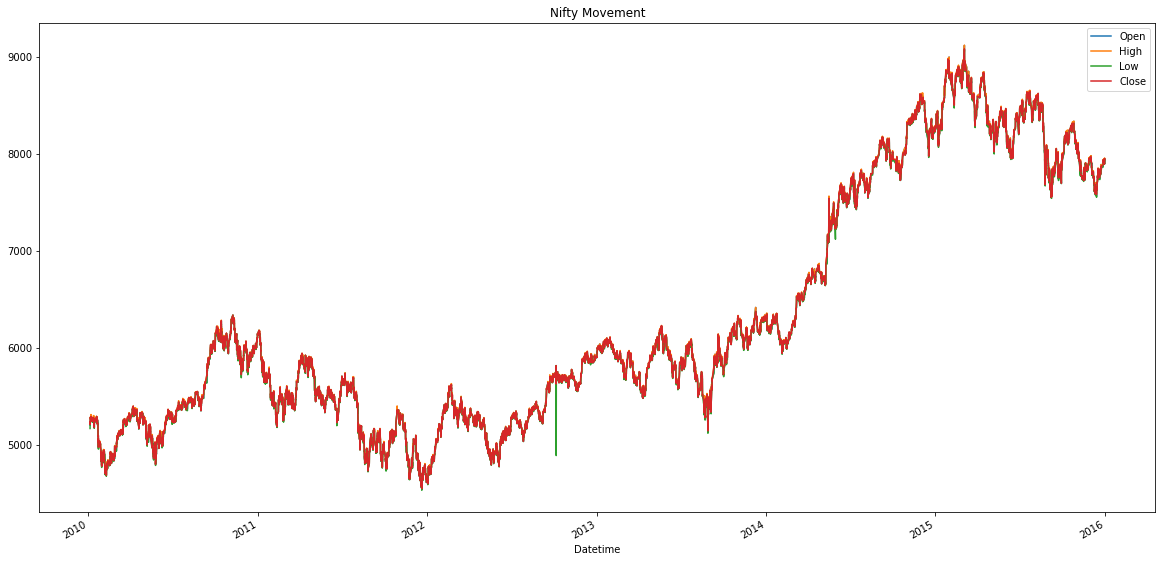

In [52]:
df.loc['2010':'2015'].plot(figsize=(20,10))
plt.title('Nifty Movement')

It looks like there are some outliers in 2012-2013. Let's check.

Text(0.5, 1.0, 'Nifty Movement')

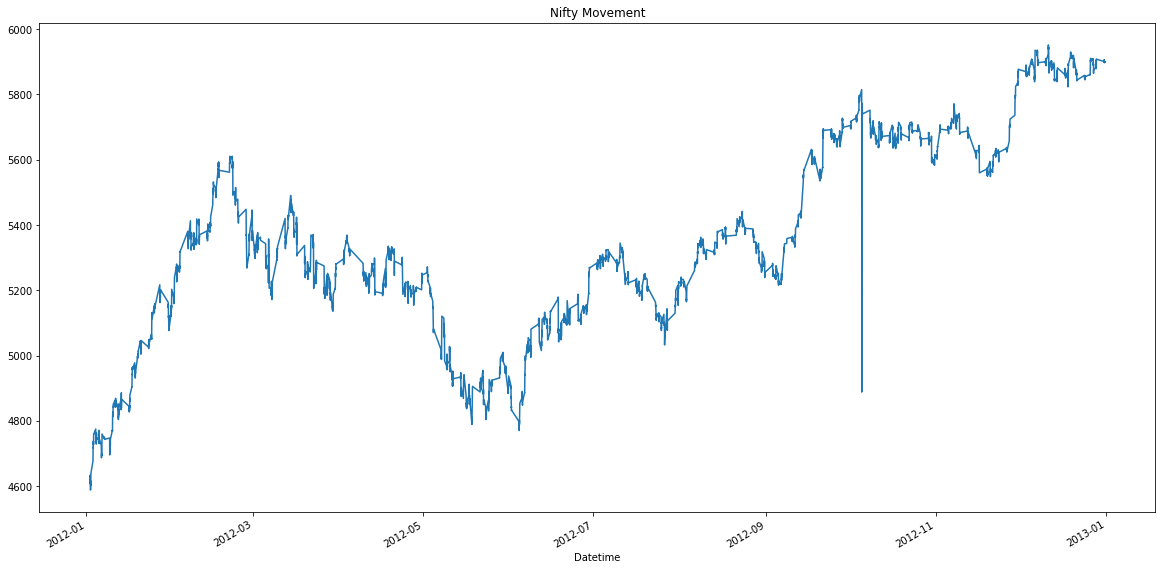

In [53]:
plt.figure(figsize=(20,10))
df.Low.loc['2012'].plot()
plt.title('Nifty Movement')

Could this be an outlier? We don't know but let's remove it any way for better functioning of our model.
Open and Low both shows this oulier.

### Removing Outliers
To avoid loss of information, we won't remove outliers from all the data. We will remove outliers from only the 10th month of 2012 and then merge it back to the main dataframe.

557/567 data points remain.


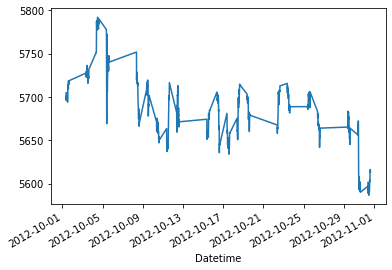

In [54]:
df2 =df.loc['2012-10']
y = df2['Low']
size= len(y)
removed_outliers = y.between(y.quantile(.008), y.quantile(.992))

print(str(y[removed_outliers].size) + "/" + str(size) + " data points remain.") 

y[removed_outliers].plot()

In [55]:
df['Low'].loc['2012-10'] = y[removed_outliers]

557/567 data points remain.


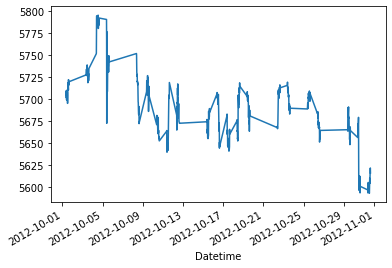

In [56]:
df3 =df.loc['2012-10']
y = df3['Open']
size= len(y)
removed_outliers = y.between(y.quantile(.008), y.quantile(.992))

print(str(y[removed_outliers].size) + "/" + str(size) + " data points remain.") 

y[removed_outliers].plot()

In [57]:
df['Open'].loc['2012-10'] = y[removed_outliers]

Text(0.5, 1.0, 'Nifty Movement')

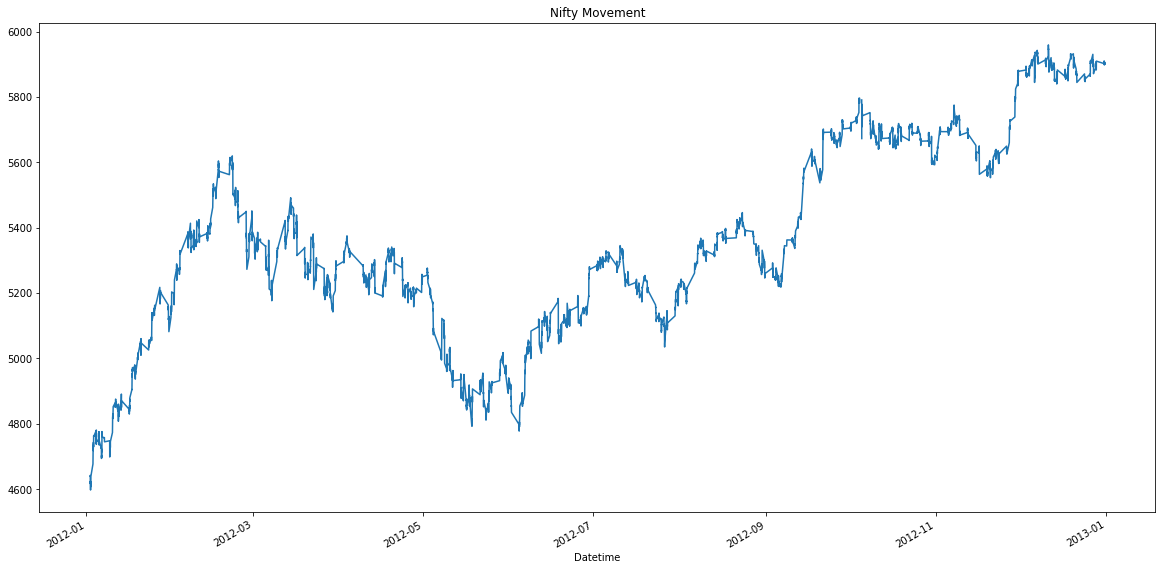

In [58]:
plt.figure(figsize=(20,10))
df.Open.loc['2012'].plot()
plt.title('Nifty Movement')

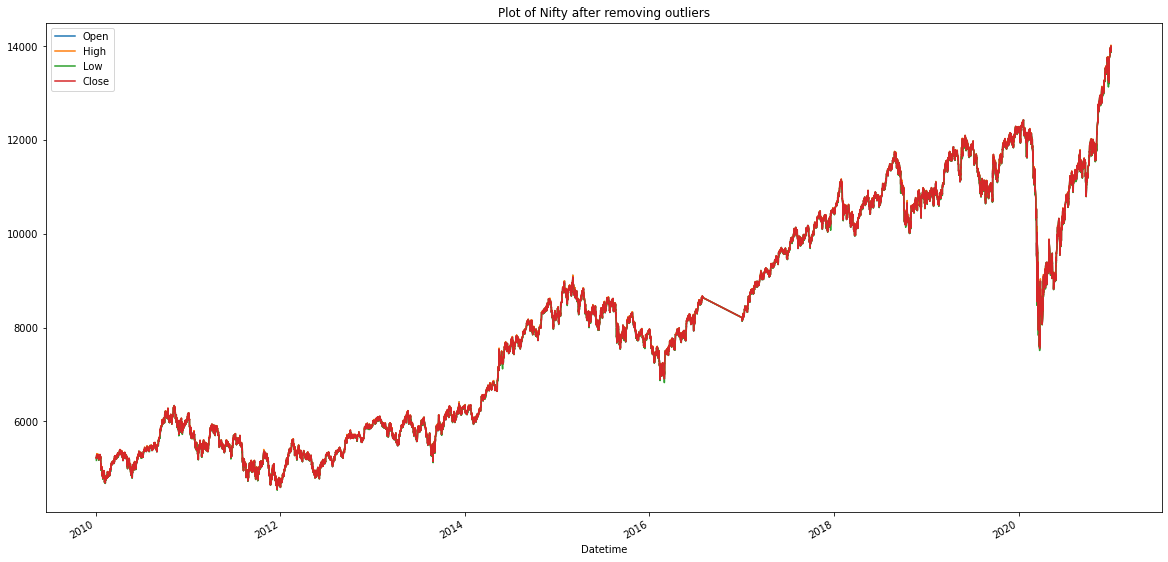

In [59]:
df.loc['2010':'2020'].plot(figsize = (20,10))
plt.title("Plot of Nifty after removing outliers")
plt.show()

While making other predictors/indicators we will again get NaNs, if we keep on deleting NaN's after making every indicator, our data will shrink in size. So we will drop all the NaNs once all the indicators are created.

## Indicators



### Bollinger Band


In [60]:
# 27 observations for 1 day when we resample the data for 15min frame.
def bollinger_band(df):
    
    df1 = df.Close.to_frame()
    df["ma3"] = df1.iloc[:,0].rolling(81).mean()        # 3 days moving average
    df["ma7"] = df1.iloc[:,0].rolling(189).mean()       # 7 days moving average
    df['ma30'] = df1.iloc[:,0].rolling(810).mean()      # 30 days moving average
    df["std3"] = df1.iloc[:,0].rolling(81).std()        # 3 days standard deviation
    df["std7"] = df1.iloc[:,0].rolling(189).std()       # 7 days standard deviation
    df["std30"] = df1.iloc[:,0].rolling(810).std()       # 7 days standard deviation
    
    df["upper_band3"] = df.ma3 + (df.std3 * 2) 
    df["lower_band3"] = df.ma3 - (df.std3 * 2) 
    df["upper_band7"] = df.ma7 + (df.std7 * 2) 
    df["lower_band7"] = df.ma7 - (df.std7 * 2) 
    df["upper_band30"] = df.ma30 + (df.std30 * 2) 
    df["lower_band30"] = df.ma30 - (df.std30 * 2) 
    
    #Any deviation to these bands should be a sign of reversal.
    df["trade_upper_band3"] = df.ma3 + (df.std3 * 2.5) 
    df["trade_lower_band3"] = df.ma3 - (df.std3 * 2.5)
    df["trade_upper_band7"] = df.ma7 + (df.std7 * 2.5) 
    df["trade_lower_band7"] = df.ma7 - (df.std7 * 2.5)
    df["trade_upper_band30"] = df.ma30 + (df.std30 * 2.5) 
    df["trade_lower_band30"] = df.ma30 - (df.std30 * 2.5)
    
    #These will act as stop losses.
    df["exit_upper_band3"] = df.ma3 + (df.std3 * 3) 
    df["exit_lower_band3"] = df.ma3 - (df.std3 * 3)
    df["exit_upper_band7"] = df.ma7 + (df.std7 * 3) 
    df["exit_lower_band7"] = df.ma7 - (df.std7 * 3)
    df["exit_upper_band30"] = df.ma30 + (df.std30 * 3) 
    df["exit_lower_band30"] = df.ma30 - (df.std30 * 3)
    
    df["width3"] = df["upper_band3"] - df["lower_band3"]
    df["width7"] = df["upper_band7"] - df["lower_band7"]
    df["width30"] = df["upper_band30"] - df["lower_band30"]
    
    
    return df

In [61]:
df = bollinger_band(df)
df.head(3)

,Open,High,Low,Close,ma3,ma7,ma30,std3,std7,std30,upper_band3,lower_band3,upper_band7,lower_band7,upper_band30,lower_band30,trade_upper_band3,trade_lower_band3,trade_upper_band7,trade_lower_band7,trade_upper_band30,trade_lower_band30,exit_upper_band3,exit_lower_band3,exit_upper_band7,exit_lower_band7,exit_upper_band30,exit_lower_band30,width3,width7,width30
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-01-01 09:45:00,6138.600098,6154.600098,6113.549805,6113.899902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-01 10:00:00,6114.049805,6130.649902,6110.500000,6123.549805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-01 10:15:00,6124.850098,6134.850098,6123.450195,6134.450195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
df = downcast(df)
df.head(2)

,Open,High,Low,Close,ma3,ma7,ma30,std3,std7,std30,upper_band3,lower_band3,upper_band7,lower_band7,upper_band30,lower_band30,trade_upper_band3,trade_lower_band3,trade_upper_band7,trade_lower_band7,trade_upper_band30,trade_lower_band30,exit_upper_band3,exit_lower_band3,exit_upper_band7,exit_lower_band7,exit_upper_band30,exit_lower_band30,width3,width7,width30
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-01-01 09:45:00,6138.600098,6154.600098,6113.549805,6113.899902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-01 10:00:00,6114.049805,6130.649902,6110.500000,6123.549805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### MACD Indicator

In [63]:
def macd(df,
         fast,
         slow,
         signal):
    
    df1 = df.Close.to_frame()
    df["ema_fast"] = df1.iloc[:,0].ewm(span=fast,min_periods=fast).mean()   #12 days
    df["ema_slow"] = df1.iloc[:,0].ewm(span=slow,min_periods=slow).mean()   #26 days
    df["macd"] = df.ema_fast - df.ema_slow
    df["signal"] = df["macd"].ewm(span=signal,min_periods=signal).mean()   #9 days
    
    return df

In [64]:
df = macd(df,324, 702, 243)   #27 observations in a day, so 324 for 12 days, 702 for 26days, 243 for 9 days.

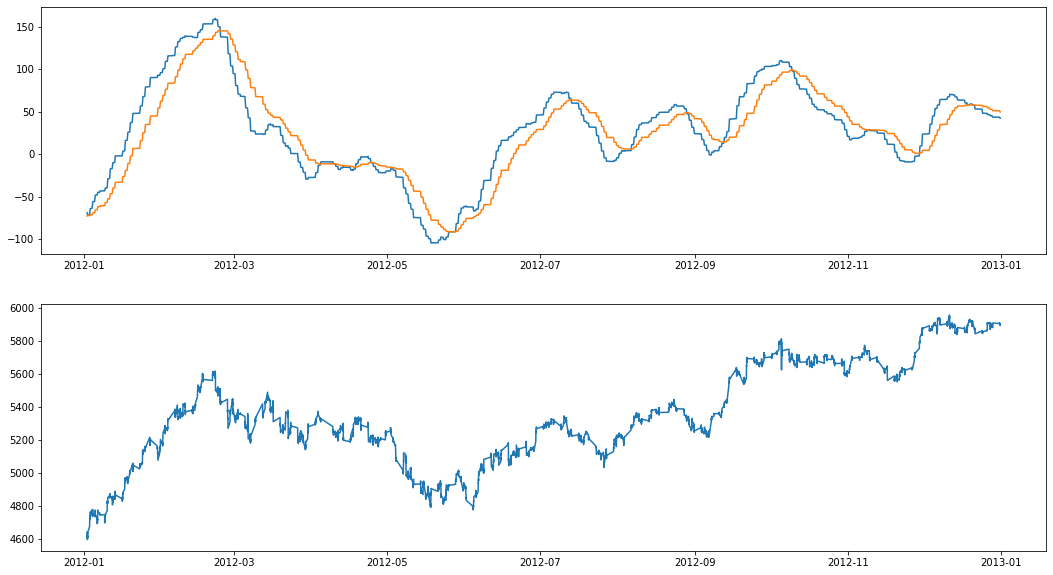

In [65]:
fig = plt.figure(figsize = (18,10))
ax1, ax2 = fig.subplots(2, 1)
#fig,ax =  plt.subplots(2,1)
ax1.plot(df.loc['2012'][['macd','signal']])

ax2.plot(df.Close.loc['2012'])
#plt.show()

As we can see macd indicator gives us a very good projection.

As you can see from the chart above, many traders will watch for a short-term moving average (blue line) to cross above a longer-term moving average (red line) and use this to signal increasing upward momentum. This bullish crossover suggests that the price has recently been rising at a faster rate than it has in the past, so it is a common technical buy sign. Conversely, a short-term moving average crossing below a longer-term average is used to illustrate that the asset's price has been moving downward at a faster rate and that it may be a good time to sell.

## Indicators from Technical Analysis Library in Python

Now we will use the technical analysis library in Python to create all the other indicators.

https://therobusttrader.com/best-trend-following-indicators/ You can read more about indicators here.

### Momentum Indicators

https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html#momentum-indicators


In [66]:
from ta.momentum import AwesomeOscillatorIndicator,KAMAIndicator, ROCIndicator,RSIIndicator,StochRSIIndicator, TSIIndicator, WilliamsRIndicator


### Awesome Oscillator
It is a 34-period simple moving average, plotted through the central points of the bars (H+L)/2, and subtracted from the 5-period simple moving average, graphed across the central points of the bars (H+L)/2.

MEDIAN PRICE = (HIGH+LOW)/2

AO = SMA(MEDIAN PRICE, 5)-SMA(MEDIAN PRICE, 34)

where

SMA — Simple Moving Average.

 https://www.ifcm.co.uk/ntx-indicators/awesome-oscillator

In [67]:
#135 for 5 days, 908 for 34 days
sample = AwesomeOscillatorIndicator(df.High, df.Low, 135, 908, False)
df['AOI'] = sample.awesome_oscillator()
df.sample(5)

,Open,High,Low,Close,ma3,ma7,ma30,std3,std7,std30,upper_band3,lower_band3,upper_band7,lower_band7,upper_band30,lower_band30,trade_upper_band3,trade_lower_band3,trade_upper_band7,trade_lower_band7,trade_upper_band30,trade_lower_band30,exit_upper_band3,exit_lower_band3,exit_upper_band7,exit_lower_band7,exit_upper_band30,exit_lower_band30,width3,width7,width30,ema_fast,ema_slow,macd,signal,AOI
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-07-23 10:00:00,11164.700195,11165.500000,11144.200195,11152.200195,11106.229492,10895.080078,10488.720703,72.582970,204.471054,381.100647,11251.395508,10961.063477,11304.022461,10486.137695,11250.922852,9726.519531,11287.686523,10924.772461,11406.257812,10383.902344,11441.472656,9535.969727,11323.978516,10888.480469,11508.493164,10281.666992,11632.023438,9345.418945,290.331879,817.884216,1524.402588,10853.798228,10596.629776,257.168452,240.662309,520.845311
2008-05-23 11:45:00,5030.799805,5041.700195,5016.600098,5041.700195,5078.891113,5054.944336,4977.656250,39.414108,59.895840,163.058350,5157.719727,5000.062988,5174.735840,4935.152344,5303.772949,4651.539551,5177.426758,4980.355957,5204.683594,4905.204590,5385.302246,4570.010254,5197.133789,4960.648926,5234.631836,4875.256836,5466.831055,4488.480957,157.656433,239.583359,652.233398,5065.743838,5030.709404,35.034434,43.099308,118.796810
2019-03-12 12:15:00,11269.500000,11277.150391,11264.900391,11274.099609,11114.512695,11011.103516,10858.326172,90.632126,129.350189,151.158859,11295.776367,10933.248047,11269.804688,10752.403320,11160.643555,10556.007812,11341.092773,10887.931641,11334.479492,10687.728516,11236.222656,10480.428711,11386.409180,10842.616211,11399.154297,10623.053711,11311.802734,10404.849609,362.528503,517.400757,604.635437,10972.696031,10900.255497,72.440534,24.349770,218.616288
2012-02-09 15:30:00,5420.250000,5422.549805,5418.649902,5419.950195,5364.459961,5315.109375,4993.351074,19.033735,65.736702,235.904678,5402.527344,5326.392578,5446.582520,5183.635742,5465.160645,4521.541992,5412.044434,5316.875488,5479.451172,5150.767578,5583.112793,4403.589355,5421.561035,5307.358887,5512.319336,5117.898926,5701.065430,4285.637207,76.134941,262.946808,943.618713,5242.904951,5105.111550,137.793400,112.426590,382.153842
2015-03-19 13:15:00,8739.549805,8754.849609,8735.150391,8747.099609,8697.723633,8708.254883,8770.243164,40.080791,44.150639,110.638855,8777.885742,8617.562500,8796.556641,8619.954102,8991.520508,8548.964844,8797.925781,8597.522461,8818.631836,8597.878906,9046.839844,8493.645508,8817.966797,8577.481445,8840.707031,8575.802734,9102.159180,8438.326172,160.323166,176.602554,442.555420,8751.109086,8750.822950,0.286136,30.973282,-78.254811


### Kaufman’s Adaptive Moving Average (KAMA)

Moving average designed to account for market noise or volatility. KAMA will closely follow prices when the price swings are relatively small and the noise is low. KAMA will adjust when the price swings widen and follow prices from a greater distance. This trend-following indicator can be used to identify the overall trend, time turning points and filter price movements.

https://www.tradingview.com/ideas/kama/

In [68]:
sample = KAMAIndicator(df.Close, 270, 54, 810, False)   #10 days , 2 days, 30days
df['KAMA'] = sample.kama()
df.sample(3)

,Open,High,Low,Close,ma3,ma7,ma30,std3,std7,std30,upper_band3,lower_band3,upper_band7,lower_band7,upper_band30,lower_band30,trade_upper_band3,trade_lower_band3,trade_upper_band7,trade_lower_band7,trade_upper_band30,trade_lower_band30,exit_upper_band3,exit_lower_band3,exit_upper_band7,exit_lower_band7,exit_upper_band30,exit_lower_band30,width3,width7,width30,ema_fast,ema_slow,macd,signal,AOI,KAMA
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-21 13:45:00,5145.250000,5148.649902,5125.500000,5134.649902,5230.908203,5238.916016,5159.515625,35.010986,33.202187,105.800079,5300.930176,5160.886230,5305.320312,5172.511719,5371.115723,4947.915527,5318.435547,5143.380371,5321.921387,5155.910645,5424.015625,4895.015137,5335.940918,5125.875000,5338.522461,5139.309082,5476.915527,4842.115234,140.043945,132.808746,423.200317,5228.038097,5177.978721,50.059376,62.978844,97.770473,5483.798701
2019-04-03 09:45:00,11746.799805,11752.450195,11741.049805,11750.099609,11669.676758,11545.009766,11172.295898,49.467743,129.191879,336.431488,11768.612305,11570.742188,11803.393555,11286.625977,11845.158203,10499.432617,11793.346680,11546.007812,11867.989258,11222.030273,12013.374023,10331.216797,11818.080078,11521.274414,11932.584961,11157.434570,12181.589844,10163.000977,197.870972,516.767517,1345.725952,11501.818036,11316.322355,185.495681,162.991952,479.514841,8001.945972
2015-08-27 12:45:00,7906.850098,7919.850098,7900.649902,7914.649902,7862.603027,8150.615723,8429.300781,57.850971,279.594360,217.681030,7978.305176,7746.901367,8709.804688,7591.426758,8864.663086,7993.938477,8007.230469,7717.975586,8849.601562,7451.629883,8973.502930,7885.098145,8036.155762,7689.050293,8989.398438,7311.832520,9082.343750,7776.257812,231.403885,1118.377441,870.724121,8198.176855,8323.200137,-125.023282,-37.567089,-408.742162,6251.510643


### ROC Indicator

The ROC calculation compares the current price with the price “n” periods ago. The plot forms an oscillator that fluctuates above and below the zero line as the Rate-of-Change moves from positive to negative. As a momentum oscillator, ROC signals include centerline crossovers, divergences and overbought-oversold readings. 

https://school.stockcharts.com/doku.php?id=technical_indicators:rate_of_change_roc_and_momentum

In [69]:
sample = ROCIndicator(df.Close, 324, False)  #12*27 =324 12days pct change 
df['ROC'] = sample.roc()
df.sample(3)

,Open,High,Low,Close,ma3,ma7,ma30,std3,std7,std30,upper_band3,lower_band3,upper_band7,lower_band7,upper_band30,lower_band30,trade_upper_band3,trade_lower_band3,trade_upper_band7,trade_lower_band7,trade_upper_band30,trade_lower_band30,exit_upper_band3,exit_lower_band3,exit_upper_band7,exit_lower_band7,exit_upper_band30,exit_lower_band30,width3,width7,width30,ema_fast,ema_slow,macd,signal,AOI,KAMA,ROC
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-08-14 09:45:00,10954.900391,10973.299805,10953.599609,10955.750000,11037.161133,10966.730469,11350.651367,97.282616,98.013741,318.173096,11231.726562,10842.595703,11162.757812,10770.703125,11986.997070,10714.304688,11280.367188,10793.954102,11211.764648,10721.696289,12146.083984,10555.218750,11329.008789,10745.313477,11260.771484,10672.689453,12305.170898,10396.131836,389.130463,392.054962,1272.692383,11066.636335,11236.480899,-169.844564,-176.290427,-412.019427,8249.771252,-2.944684
2018-06-25 15:30:00,10757.599609,10762.500000,10755.500000,10762.500000,10772.512695,10774.371094,10703.125977,28.675915,33.201073,109.014259,10829.864258,10715.160156,10840.773438,10707.968750,10921.154297,10485.096680,10844.202148,10700.822266,10857.374023,10691.368164,10975.661133,10430.589844,10858.540039,10686.484375,10873.973633,10674.767578,11030.167969,10376.083008,114.703659,132.804291,436.057037,10765.797387,10727.371920,38.425468,42.893139,51.783960,7461.447091,-0.053860
2020-06-25 15:30:00,10281.500000,10293.650391,10280.200195,10288.900391,10379.309570,10219.518555,9735.696289,88.143036,198.831879,499.060394,10555.595703,10203.023438,10617.181641,9821.854492,10733.816406,8737.575195,10599.666992,10158.952148,10716.597656,9722.438477,10983.346680,8488.044922,10643.738281,10114.879883,10816.013672,9623.022461,11232.876953,8238.514648,352.572144,795.327515,1996.241577,10145.954695,9917.667074,228.287621,204.465473,641.168806,8661.830452,2.411251


### Relative Strength Index (RSI)

Compares the magnitude of recent gains and losses over a specified time period to measure speed and change of price movements of a security. It is primarily used to attempt to identify overbought or oversold conditions in the trading of an asset.

https://www.investopedia.com/terms/r/rsi.asp

In [70]:
sample = RSIIndicator(df.Close, 378, False)  #14*27 =378 14days relative strength index 
df['RSI'] = sample.rsi()
df.sample(3)

,Open,High,Low,Close,ma3,ma7,ma30,std3,std7,std30,upper_band3,lower_band3,upper_band7,lower_band7,upper_band30,lower_band30,trade_upper_band3,trade_lower_band3,trade_upper_band7,trade_lower_band7,trade_upper_band30,trade_lower_band30,exit_upper_band3,exit_lower_band3,exit_upper_band7,exit_lower_band7,exit_upper_band30,exit_lower_band30,width3,width7,width30,ema_fast,ema_slow,macd,signal,AOI,KAMA,ROC,RSI
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-05-10 12:00:00,7843.649902,7855.500000,7843.549805,7849.450195,7778.496094,7782.531738,7759.537598,62.417137,56.547421,118.950844,7903.330566,7653.662109,7895.626465,7669.437012,7997.439453,7521.636230,7934.539062,7622.453613,7923.900391,7641.163086,8056.915039,7462.160645,7965.747559,7591.244629,7952.173828,7612.889648,8116.390137,7402.685059,249.668549,226.189682,475.803375,7801.547569,7753.291825,48.255744,72.726591,32.611193,6451.591455,-0.602125,51.672467
2020-01-17 12:00:00,12351.650391,12352.900391,12336.599609,12343.900391,12336.039062,12288.548828,12162.511719,27.476675,80.687271,138.505234,12390.993164,12281.085938,12449.923828,12127.174805,12439.521484,11885.500977,12404.731445,12267.347656,12490.267578,12086.831055,12508.774414,11816.248047,12418.469727,12253.609375,12530.611328,12046.487305,12578.027344,11746.996094,109.906700,322.749084,554.020935,12254.530272,12186.766441,67.763831,55.446696,180.098654,8487.743155,1.319868,52.442374
2009-04-23 10:00:00,3343.000000,3350.050049,3326.550049,3333.800049,3385.273438,3375.375244,2964.077148,49.626369,65.653236,285.096252,3484.526123,3286.020752,3506.681641,3244.068604,3534.269531,2393.884521,3509.339355,3261.207520,3539.508301,3211.241943,3676.817871,2251.336426,3534.152588,3236.394287,3572.334717,3178.415527,3819.365967,2108.788330,198.505478,262.612946,1140.385010,3265.074320,3105.436660,159.637661,129.988494,457.685827,5598.614965,7.856811,53.275942


### Stochastic RSI

The StochRSI oscillator was developed to take advantage of both momentum indicators in order to create a more sensitive indicator that is attuned to a specific security’s historical performance rather than a generalized analysis of price change.

https://school.stockcharts.com/doku.php?id=technical_indicators:stochrsi https://www.investopedia.com/terms/s/stochrsi.asp

In [71]:
sample = StochRSIIndicator(df.Close, 378,81,81, False)  #window 14days , smooth_window 3days
df['STOCH_RSI'] = sample.stochrsi()
df['STOCH_RSI3'] = sample.stochrsi_k()
df.sample(3)

,Open,High,Low,Close,ma3,ma7,ma30,std3,std7,std30,upper_band3,lower_band3,upper_band7,lower_band7,upper_band30,lower_band30,trade_upper_band3,trade_lower_band3,trade_upper_band7,trade_lower_band7,trade_upper_band30,trade_lower_band30,exit_upper_band3,exit_lower_band3,exit_upper_band7,exit_lower_band7,exit_upper_band30,exit_lower_band30,width3,width7,width30,ema_fast,ema_slow,macd,signal,AOI,KAMA,ROC,RSI,STOCH_RSI,STOCH_RSI3
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-03-19 13:15:00,5744.299805,5755.350098,5742.399902,5751.399902,5856.361328,5885.649902,5871.710938,50.047417,51.041237,75.813217,5956.456055,5756.266113,5987.732422,5783.567383,6023.337402,5720.084473,5981.479492,5731.242676,6013.252930,5758.046875,6061.244141,5682.177734,6006.503418,5706.218750,6038.773926,5732.526367,6099.150391,5644.270996,200.189667,204.164948,303.252869,5854.992683,5870.852355,-15.859672,-23.673069,-25.438783,5459.243173,0.508538,47.342856,0.368635,0.650810
2011-09-27 09:15:00,4909.799805,4926.700195,4906.000000,4917.649902,4897.214844,5009.848633,4995.954102,79.261780,114.400505,104.916290,5055.738281,4738.691406,5238.649902,4781.047852,5205.786621,4786.121582,5095.369141,4699.060547,5295.850098,4723.847656,5258.244629,4733.663574,5135.000000,4659.429688,5353.050293,4666.646973,5310.703125,4681.205078,317.047119,457.602020,419.665161,4988.743855,5038.788318,-50.044462,-45.659147,-24.978722,5486.506295,-4.542234,48.278345,0.433440,0.205235
2021-03-23 14:30:00,14854.599609,14872.849609,14841.099609,14869.150391,14676.681641,14780.921875,14992.353516,106.696503,141.210068,212.232101,14890.075195,14463.289062,15063.341797,14498.500977,15416.817383,14567.888672,14943.423828,14409.940430,15133.946289,14427.896484,15522.933594,14461.773438,14996.771484,14356.592773,15204.551758,14357.291016,15629.049805,14355.657227,426.786011,564.840271,848.928406,14844.105768,14853.835760,-9.729992,55.402685,-249.320872,9329.384145,-1.665886,50.146386,0.526459,0.313497


### True strength index (TSI)

Shows both trend direction and overbought/oversold conditions.

https://school.stockcharts.com/doku.php?id=technical_indicators:true_strength_index

In [72]:
sample = TSIIndicator(df.Close, 675,351, False)  #slow=25days , fast = 13days
df['TSI'] = sample.tsi()
df.sample(3)

,Open,High,Low,Close,ma3,ma7,ma30,std3,std7,std30,upper_band3,lower_band3,upper_band7,lower_band7,upper_band30,lower_band30,trade_upper_band3,trade_lower_band3,trade_upper_band7,trade_lower_band7,trade_upper_band30,trade_lower_band30,exit_upper_band3,exit_lower_band3,exit_upper_band7,exit_lower_band7,exit_upper_band30,exit_lower_band30,width3,width7,width30,ema_fast,ema_slow,macd,signal,AOI,KAMA,ROC,RSI,STOCH_RSI,STOCH_RSI3,TSI
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-03-30 13:30:00,7702.200195,7711.850098,7702.200195,7705.149902,7655.429199,7639.707031,7348.637695,38.457268,56.621437,241.055252,7732.343750,7578.514648,7752.950195,7526.464355,7830.748047,6866.526855,7751.572266,7559.285645,7781.260742,7498.153320,7951.275391,6745.999512,7770.800781,7540.057129,7809.571289,7469.842773,8071.803223,6625.471680,153.829071,226.485748,964.221008,7575.789708,7482.753385,93.036323,67.073534,321.200056,6424.021758,3.098930,53.299591,0.723842,0.604877,5.188210
2014-05-05 09:15:00,6689.649902,6716.600098,6680.450195,6712.799805,6725.940918,6774.869629,6678.845215,26.025959,50.767231,106.348816,6777.992676,6673.888672,6876.403809,6673.334961,6891.542969,6466.147949,6791.005371,6660.875977,6901.787598,6647.951660,6944.717285,6412.973145,6804.018555,6647.862793,6927.171387,6622.567871,6997.891602,6359.798828,104.103836,203.068924,425.395264,6746.126005,6681.996589,64.129416,87.835479,91.453040,5594.315261,-1.454808,50.962113,0.178348,0.116966,6.143861
2014-11-10 09:45:00,8352.450195,8352.849609,8325.099609,8334.849609,8327.914062,8207.135742,8010.645020,16.605476,129.676071,149.446854,8361.125000,8294.703125,8466.488281,7947.783691,8309.539062,7711.750977,8369.427734,8286.400391,8531.326172,7882.945801,8384.261719,7637.027832,8377.730469,8278.097656,8596.164062,7818.107910,8458.985352,7562.304199,66.421906,518.704285,597.787415,8144.387326,8054.296187,90.091139,35.526220,257.664213,5822.775103,6.221079,54.994521,0.872149,0.931654,6.041125


### Williams %R

Readings from 0 to -20 are considered overbought. Readings from -80 to -100 are considered oversold.

%R = (Highest High - Close)/(Highest High - Lowest Low) * -100

Lowest Low = lowest low for the look-back period Highest High = highest high for the look-back period %R is multiplied by -100 correct the inversion and move the decimal.

https://school.stockcharts.com/doku.php?id=technical_indicators:williams_r

The Williams %R oscillates from 0 to -100. When the indicator produces readings from 0 to -20, this indicates overbought market conditions. When readings are -80 to -100, it indicates oversold market conditions.

In [73]:
sample = WilliamsRIndicator(df.High, df.Low, df.Close, 378, False)  #14days
df['WRI'] = sample.williams_r()
df.sample(3)

,Open,High,Low,Close,ma3,ma7,ma30,std3,std7,std30,upper_band3,lower_band3,upper_band7,lower_band7,upper_band30,lower_band30,trade_upper_band3,trade_lower_band3,trade_upper_band7,trade_lower_band7,trade_upper_band30,trade_lower_band30,exit_upper_band3,exit_lower_band3,exit_upper_band7,exit_lower_band7,exit_upper_band30,exit_lower_band30,width3,width7,width30,ema_fast,ema_slow,macd,signal,AOI,KAMA,ROC,RSI,STOCH_RSI,STOCH_RSI3,TSI,WRI
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-07-24 14:00:00,5137.899902,5140.799805,5130.549805,5130.799805,5167.738281,5196.224609,5197.977051,43.424000,41.039772,79.577515,5254.586426,5080.890137,5278.304199,5114.145020,5357.132324,5038.822266,5276.298340,5059.178223,5298.824219,5093.625000,5396.920898,4999.033203,5298.010254,5037.466309,5319.343750,5073.105469,5436.709473,4959.244629,173.695999,164.159088,318.310059,5207.554339,5192.421162,15.133176,40.538125,4.160886,5425.826100,-3.462944,48.614863,0.089810,0.103115,1.453463,-88.768925
2021-01-18 15:15:00,14299.000000,14299.000000,14224.950195,14230.849609,14465.655273,14458.925781,13901.015625,109.480186,113.783829,395.663361,14684.616211,14246.695312,14686.493164,14231.358398,14692.342773,13109.689453,14739.356445,14191.955078,14743.385742,14174.466797,14890.173828,12911.857422,14794.095703,14137.214844,14800.277344,14117.574219,15088.005859,12714.025391,437.920746,455.135315,1582.653442,14303.130479,13989.587174,313.543305,321.614552,680.168040,9134.049158,1.886172,52.483471,0.000000,0.314926,11.212806,-53.589588
2019-09-12 10:30:00,11052.599609,11068.299805,11052.599609,11065.000000,10999.717773,10924.389648,10979.632812,49.082813,85.429321,110.937141,11097.883789,10901.552734,11095.248047,10753.530273,11201.506836,10757.758789,11122.424805,10877.010742,11137.962891,10710.815430,11256.975586,10702.290039,11146.966797,10852.469727,11180.676758,10668.101562,11312.444336,10646.821289,196.331253,341.717285,443.748566,10959.693947,11021.172479,-61.478531,-92.641547,-70.535668,8265.911044,2.039877,50.335961,0.974148,0.904606,-2.498082,-15.210079


### Volatility Indicators


In [74]:
from ta.volatility import AverageTrueRange, DonchianChannel

**Average True Range (ATR)**

The indicator provide an indication of the degree of price volatility. Strong moves, in either direction, are often accompanied by large ranges, or large True Ranges.

http://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:average_true_range_atr

The most common trading approach involving moving averages is to assume that the trend is positive if the average has a positive slope, and the price trades above it, with the opposite conditions applying for a negative trend. When using moving averages to determine the direction of the trend, it’s often done long term, using the 200-period moving average.

You may also use two moving averages in conjunction to create a cross over signals. One of the most well-known examples involves a crossover by the 50-period moving average over the 200-period moving average, which is called a golden cross.


In [75]:
sample = AverageTrueRange(df.High, df.Low, df.Close, 378, False)  #14days
df['ATR'] = sample.average_true_range()
df.sample(3)

,Open,High,Low,Close,ma3,ma7,ma30,std3,std7,std30,upper_band3,lower_band3,upper_band7,lower_band7,upper_band30,lower_band30,trade_upper_band3,trade_lower_band3,trade_upper_band7,trade_lower_band7,trade_upper_band30,trade_lower_band30,exit_upper_band3,exit_lower_band3,exit_upper_band7,exit_lower_band7,exit_upper_band30,exit_lower_band30,width3,width7,width30,ema_fast,ema_slow,macd,signal,AOI,KAMA,ROC,RSI,STOCH_RSI,STOCH_RSI3,TSI,WRI,ATR
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-11-27 14:30:00,6040.950195,6060.100098,6039.750000,6060.000000,6067.721191,6098.131348,6143.388184,29.083839,66.567436,80.188774,6125.888672,6009.553223,6231.266113,5964.996582,6303.766113,5983.010742,6140.430664,5995.011230,6264.550293,5931.712891,6343.860352,5942.916504,6154.972656,5980.469238,6297.833984,5898.429199,6383.954590,5902.821777,116.335358,266.269745,320.755096,6099.704815,6095.026766,4.678049,29.738784,-57.762994,5516.352524,-1.556253,49.440149,0.266493,0.249312,0.387884,-72.338134,13.914640
2017-08-02 13:00:00,10093.700195,10094.599609,10087.500000,10091.500000,10067.024414,10031.529297,9789.833008,40.092987,53.587570,186.216309,10147.209961,9986.837891,10138.705078,9924.354492,10162.265625,9417.400391,10167.256836,9966.791992,10165.499023,9897.560547,10255.373047,9324.291992,10187.302734,9946.745117,10192.291992,9870.766602,10348.481445,9231.183594,160.371948,214.350281,744.865234,9978.894427,9864.987827,113.906600,99.694185,282.940557,6863.260163,1.859749,54.724099,0.488516,0.488064,9.039120,-13.391122,12.344183
2009-04-24 11:15:00,3425.899902,3436.649902,3425.449951,3429.850098,3369.345703,3391.625732,2986.638672,35.306267,47.555828,292.950592,3439.958252,3298.733154,3486.737305,3296.513916,3572.539795,2400.737305,3457.611328,3281.080078,3510.515137,3272.736084,3719.015137,2254.261963,3475.264404,3263.426758,3534.293213,3248.958252,3865.490479,2107.786865,141.225067,190.223312,1171.802368,3285.863072,3128.084098,157.778974,135.919577,438.960244,5596.071428,14.952916,54.303251,0.407117,0.317484,9.229347,-14.661548,16.706917


**Donchian Channel**

https://www.investopedia.com/terms/d/donchianchannels.asp

The indicator itself is very simple, and consists of a lower and an upper band, which are made up of the 20-bar high, and the 20-bar low.

As soon as the market breaks out above the upper band, or below the lower band, it’s interpreted as a signal to enter a position in the direction of the breakout.

However, of course, this is just the basic setup, and to turn it into a working trading strategy, you’ll have to add more filters and conditions to get rid of a lot of false signals.

In [76]:
sample = DonchianChannel(df.High, df.Low, df.Close, 540,0, False)  #window 20 days
df['DC_HB'] = sample.donchian_channel_hband()   # DC High Band
df['DC_LB'] = sample.donchian_channel_lband()   # DC Low Band
df['DC_MB'] = sample.donchian_channel_mband()   # DC Middle Band
df['DC_PB'] = sample.donchian_channel_pband()   # DC Percentage Band
df['DC_WB'] = sample.donchian_channel_wband()   # DC Width Band
df.sample(3)

,Open,High,Low,Close,ma3,ma7,ma30,std3,std7,std30,upper_band3,lower_band3,upper_band7,lower_band7,upper_band30,lower_band30,trade_upper_band3,trade_lower_band3,trade_upper_band7,trade_lower_band7,trade_upper_band30,trade_lower_band30,exit_upper_band3,exit_lower_band3,exit_upper_band7,exit_lower_band7,exit_upper_band30,exit_lower_band30,width3,width7,width30,ema_fast,ema_slow,macd,signal,AOI,KAMA,ROC,RSI,STOCH_RSI,STOCH_RSI3,TSI,WRI,ATR,DC_HB,DC_LB,DC_MB,DC_PB,DC_WB
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-02-04 09:45:00,5518.500000,5529.649902,5516.350098,5516.500000,5469.443848,5539.629395,5818.325195,34.905128,104.969856,220.769272,5539.253906,5399.633789,5749.568848,5329.689453,6259.863770,5376.786621,5556.706543,5382.181152,5802.054199,5277.204590,6370.248535,5266.402344,5574.159180,5364.728516,5854.539062,5224.719727,6480.633301,5156.017578,139.620514,419.879425,883.077087,5596.361947,5717.767962,-121.406015,-96.787594,-355.002932,5491.356178,-3.453040,46.932894,0.568245,0.341576,-7.026457,-73.473873,16.534132,6086.899902,5402.000000,5744.449951,0.167178,12.026352
2017-05-24 12:30:00,9402.500000,9404.250000,9391.250000,9392.750000,9422.673828,9453.715820,9312.940430,25.284668,38.999603,118.448402,9473.243164,9372.104492,9531.714844,9375.716797,9549.837891,9076.043945,9485.884766,9359.461914,9551.214844,9356.216797,9609.061523,9016.819336,9498.527344,9346.819336,9570.714844,9336.716797,9668.286133,8957.595703,101.138672,155.998413,473.793610,9413.598870,9346.129844,67.469026,75.009932,138.636696,6743.309115,0.854162,51.065975,0.026056,0.163799,5.425532,-53.664551,12.629283,9532.599609,9266.500000,9399.549805,0.474446,2.835463
2018-01-15 13:15:00,10741.900391,10757.799805,10741.200195,10749.299805,10672.439453,10625.963867,10415.587891,48.473579,61.741512,178.169983,10769.386719,10575.492188,10749.446289,10502.480469,10771.927734,10059.248047,10793.623047,10551.255859,10780.317383,10471.609375,10861.013672,9970.163086,10817.860352,10527.018555,10811.188477,10440.739258,10950.098633,9881.078125,193.894318,246.966049,712.679932,10583.821340,10492.563259,91.258081,73.282729,247.011776,7162.135614,2.354788,54.943158,0.871923,0.861698,6.539262,-8.836082,13.365432,10782.700195,10074.799805,10428.750000,0.952818,6.726423


### Trend Indicators

In [77]:
from ta.trend import AroonIndicator, ADXIndicator

**Aroon Indicator**

Well, Aroon consists of two separate parts, which are “Aron-Up”, and “Aroon-Down”.

Aroon-up measures the number of bars since the last 25-bar high, while Aroon down measures the number of bars since the last 25-bar low.

While the logic might seem similar to what’s used in other momentum indicators, such as stochastics, Aroon remains special because it not only takes into account the actual position of the close relative to the previous highs and lows, but also the time that has passed.

Identify when trends are likely to change direction.

Aroon Up = ((N - Days Since N-day High) / N) x 100 Aroon Down = ((N - Days Since N-day Low) / N) x 100 Aroon Indicator = Aroon Up - Aroon Down

https://www.investopedia.com/terms/a/aroon.asp

**Interpretation**

When interpreting the indicator, you generally say that there are three stages to an emerging signal:

The first stage is when Aroon Up is above Aroon down. Bearing the original definition of the indicator in mind, this shows us that highs have been more recent than lows.
In the second stage, the Aroon-up line should move up above 50, while the Aroon-down line should move below 50.
The final stage occurs when Arron-up goes up to 100, indicating that a new high has been made, while Arron-down remains on very low levels.

In [78]:
sample = AroonIndicator(df.Close, 675, False)  #25days
df['AI_D'] = sample.aroon_down()
df['AI_I'] = sample.aroon_indicator()
df['AI_U'] = sample.aroon_up()
df.sample(3)

,Open,High,Low,Close,ma3,ma7,ma30,std3,std7,std30,upper_band3,lower_band3,upper_band7,lower_band7,upper_band30,lower_band30,trade_upper_band3,trade_lower_band3,trade_upper_band7,trade_lower_band7,trade_upper_band30,trade_lower_band30,exit_upper_band3,exit_lower_band3,exit_upper_band7,exit_lower_band7,exit_upper_band30,exit_lower_band30,width3,width7,width30,ema_fast,ema_slow,macd,signal,AOI,KAMA,ROC,RSI,STOCH_RSI,STOCH_RSI3,TSI,WRI,ATR,DC_HB,DC_LB,DC_MB,DC_PB,DC_WB,AI_D,AI_I,AI_U
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-05-24 10:00:00,7734.000000,7740.350098,7730.549805,7734.700195,7787.626953,7821.799805,7805.412109,33.426994,49.737537,111.011757,7854.480957,7720.772949,7921.274902,7722.324707,8027.435547,7583.388672,7871.194824,7704.059570,7946.143555,7697.456055,8082.941406,7527.882812,7887.908203,7687.346191,7971.012207,7672.586914,8138.447266,7472.376953,133.707977,198.950150,444.047028,7816.077587,7791.603841,24.473746,44.150283,28.068539,6456.096144,0.192363,49.175285,0.036265,0.228581,1.613734,-78.471787,15.145143,7992.000000,7678.350098,7835.175049,0.179659,4.005236,53.333333,-22.666667,30.666667
2008-05-28 12:15:00,4865.649902,4868.399902,4859.850098,4864.399902,4922.666504,5020.320312,4989.159180,61.708683,98.132828,152.408325,5046.083984,4799.249512,5216.585938,4824.054688,5293.976074,4684.342773,5076.938477,4768.395020,5265.652344,4774.988281,5370.180176,4608.138672,5107.792480,4737.540527,5314.718750,4725.921387,5446.384277,4531.934570,246.834732,392.531311,609.633301,5007.599572,5007.479564,0.120008,31.129455,14.650259,5950.988522,-5.410635,48.119937,0.068041,0.108418,0.269679,-93.357271,17.614808,5254.399902,4836.649902,5045.524902,0.066427,8.244147,3.111111,42.222222,45.333333
2019-02-28 13:00:00,10800.049805,10800.150391,10788.099609,10793.099609,10832.513672,10783.261719,10827.801758,41.665211,67.224747,117.110466,10915.843750,10749.183594,10917.711914,10648.812500,11062.022461,10593.581055,10936.676758,10728.350586,10951.324219,10615.200195,11120.578125,10535.025391,10957.508789,10707.517578,10984.936523,10581.587891,11179.132812,10476.469727,166.660843,268.898987,468.441864,10799.496938,10807.774572,-8.277633,-11.732979,-11.945494,7888.555409,-0.753107,49.812831,0.532403,0.531734,-0.453830,-52.539601,19.465836,11118.099609,10585.650391,10851.875000,0.389613,4.914315,12.296296,28.148148,40.444444


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 82328 entries, 2008-01-01 09:45:00 to 2021-03-31 15:30:00
Data columns (total 52 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Open                82318 non-null  float32
 1   High                82328 non-null  float32
 2   Low                 82318 non-null  float32
 3   Close               82328 non-null  float32
 4   ma3                 82248 non-null  float32
 5   ma7                 82140 non-null  float32
 6   ma30                81519 non-null  float32
 7   std3                82248 non-null  float32
 8   std7                82140 non-null  float32
 9   std30               81519 non-null  float32
 10  upper_band3         82248 non-null  float32
 11  lower_band3         82248 non-null  float32
 12  upper_band7         82140 non-null  float32
 13  lower_band7         82140 non-null  float32
 14  upper_band30        81519 non-null  float32
 15  lower_band30      

In [80]:
df = downcast(df)  #all datatypes to float32

In [81]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 79908 entries, 2008-03-05 14:00:00 to 2021-03-31 15:30:00
Data columns (total 52 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Open                79908 non-null  float32
 1   High                79908 non-null  float32
 2   Low                 79908 non-null  float32
 3   Close               79908 non-null  float32
 4   ma3                 79908 non-null  float32
 5   ma7                 79908 non-null  float32
 6   ma30                79908 non-null  float32
 7   std3                79908 non-null  float32
 8   std7                79908 non-null  float32
 9   std30               79908 non-null  float32
 10  upper_band3         79908 non-null  float32
 11  lower_band3         79908 non-null  float32
 12  upper_band7         79908 non-null  float32
 13  lower_band7         79908 non-null  float32
 14  upper_band30        79908 non-null  float32
 15  lower_band30      